<a href="https://colab.research.google.com/github/Shreyabaral/SocialMediaAnalytics/blob/main/Topic_Modelling_Reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install praw
!pip install pandas nltk gensim pyLDAvis

import praw
import random
import csv

import pandas as pd

!pip install plotly

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt


from wordcloud import WordCloud

import re
import string
import ast

#import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Set up your Reddit instance

client_id = 'pPsx95TX-i0nWFf0_jXygg'
client_secret = 'OSwboGqfZY_-MkgxAjGgGIyjxX_DZA'
user_agent = 'testscript by u/fakebot3'

reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent
)

def get_random_posts(subreddit_name, num_posts=5000):
    subreddit = reddit.subreddit(subreddit_name)
    posts = list(subreddit.top(limit=5000))  # Adjust this limit as needed
    random_posts = random.sample(posts, min(num_posts, len(posts)))

    return [(post.title, post.url) for post in random_posts]

def save_to_csv(posts, filename='random_reddit_posts.csv'):
    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Title', 'URL'])  # Header
        writer.writerows(posts)  # Write post data

# Example usage
if __name__ == "__main__":
    subreddit_name = "technology" # You can specify any subreddit
    num_posts = 5000  # Number of random posts to fetch
    random_posts = get_random_posts(subreddit_name, num_posts)
    save_to_csv(random_posts)

    print(f"Saved {num_posts} random posts to random_reddit_posts.csv")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Saved 5000 random posts to random_reddit_posts.csv


In [7]:
df= pd.read_csv('random_reddit_posts.csv')

In [8]:
df.shape

(996, 2)

In [9]:
df

,Title,URL
0,"Family says Amazon shipped fake product, refus...",https://www.cbc.ca/news/business/amazon-return...
1,Comcast rejected by small town—residents vote ...,https://arstechnica.com/tech-policy/2018/12/co...
2,"Tesla shares sink, wipe out over $125 billion ...",https://www.npr.org/2022/04/26/1094870412/tesl...
3,YouTube CEO: We’ll ban any coronavirus content...,https://www.verdict.co.uk/youtube-coronavirus-...
4,Colorado Schools Could Soon Teach Kids How To ...,https://denver.cbslocal.com/2021/02/08/colorad...
...,...,...
991,Facebook and Instagram threaten to charge for ...,https://www.imore.com/facebook-and-instagram-t...
992,"FCC Releases Net Neutrality Killing Order, Hop...",https://www.techdirt.com/articles/20171122/094...
993,Vault 7: CIA Hacking Tools Revealed,https://wikileaks.org/ciav7p1/
994,Twitter CEO: 'Not true' that removing Trump ca...,https://thehill.com/policy/technology/501451-t...


#Data Cleaning



In [16]:
# Convert text to lowercase
def convert_to_lower_case(text):
  return text.lower()

In [18]:
def remove_punctuation(text):
  # Create a translation table to remove punctuation
  translator = str.maketrans('', '', string.punctuation)

  # Remove punctuation using the translation table
  text_without_punct = text.translate(translator)

  return text_without_punct

In [33]:

def tokenize(text):
  return word_tokenize(text)

In [12]:
# Remove stopwords
def remove_stop_words(tokens):
  stop_words = set(stopwords.words('english'))
  return [word for word in tokens if word not in stop_words]

In [27]:
def lemmatize(tokens):
  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(word) if lemmatizer.lemmatize(word) is not None else word for word in tokens]

In [14]:
# Remove special characters and numbers
def remove_special_chars(tokens):
    return [re.sub('[^A-Za-z]+', '', word) for word in tokens]

In [84]:
# Load the data from the CSV file
data = pd.read_csv('random_reddit_posts.csv')

def preprocess(text):
    # Simple preprocessing: lowercasing, removing stopwords, and tokenization
    lower_text = convert_to_lower_case(text) # converting to lowercase
    removed_punctuation = remove_punctuation(lower_text) # removing punctuation
    tokens = tokenize(removed_punctuation) # tokenize words
    tokens = remove_stop_words(tokens) # removing stop words
    tokens = lemmatize(tokens) # lemmatize tokens
    tokens = remove_special_chars(tokens) # remove special characters from token
    return tokens

# Apply function on text column
data['tokens'] = data['Title'].apply(preprocess)


In [85]:
data

,Title,URL,tokens
0,"Family says Amazon shipped fake product, refus...",https://www.cbc.ca/news/business/amazon-return...,"[family, say, amazon, shipped, fake, product, ..."
1,Comcast rejected by small town—residents vote ...,https://arstechnica.com/tech-policy/2018/12/co...,"[comcast, rejected, small, townresidents, vote..."
2,"Tesla shares sink, wipe out over $125 billion ...",https://www.npr.org/2022/04/26/1094870412/tesl...,"[tesla, share, sink, wipe, , billion, value, m..."
3,YouTube CEO: We’ll ban any coronavirus content...,https://www.verdict.co.uk/youtube-coronavirus-...,"[youtube, ceo, , ban, coronavirus, content, gu..."
4,Colorado Schools Could Soon Teach Kids How To ...,https://denver.cbslocal.com/2021/02/08/colorad...,"[colorado, school, could, soon, teach, kid, di..."
...,...,...,...
991,Facebook and Instagram threaten to charge for ...,https://www.imore.com/facebook-and-instagram-t...,"[facebook, instagram, threaten, charge, access..."
992,"FCC Releases Net Neutrality Killing Order, Hop...",https://www.techdirt.com/articles/20171122/094...,"[fcc, release, net, neutrality, killing, order..."
993,Vault 7: CIA Hacking Tools Revealed,https://wikileaks.org/ciav7p1/,"[vault, , cia, hacking, tool, revealed]"
994,Twitter CEO: 'Not true' that removing Trump ca...,https://thehill.com/policy/technology/501451-t...,"[twitter, ceo, true, removing, trump, campaign..."


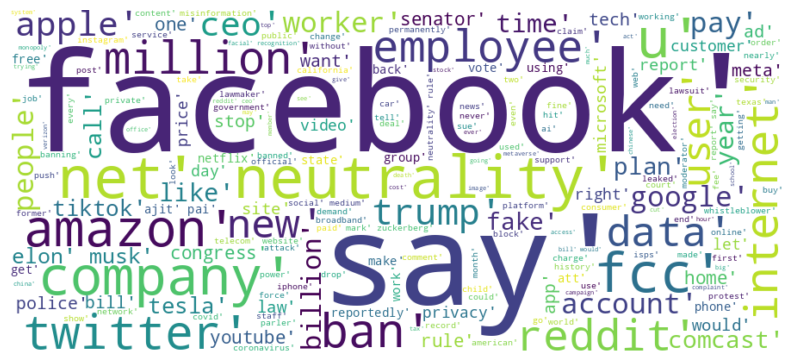

In [97]:
def generate_word_cloud():

    combined_text = ' '.join(data['tokens'].astype(str).tolist())

    # Create a word cloud
    wordcloud = WordCloud(width=900, height=400, background_color='white').generate(combined_text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.show()

generate_word_cloud()

In [103]:
# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(data['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in data['tokens']]

# Apply LDA
num_topics = 15# Adjust the number of topics as needed
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic {idx}: {topic}')

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

Topic 0: 0.047*"" + 0.013*"net" + 0.013*"neutrality" + 0.009*"u" + 0.009*"say" + 0.008*"new" + 0.007*"employee" + 0.006*"like" + 0.006*"company" + 0.006*"amazon"
Topic 1: 0.027*"" + 0.017*"say" + 0.016*"social" + 0.014*"medium" + 0.011*"ban" + 0.010*"facebook" + 0.010*"u" + 0.008*"people" + 0.008*"report" + 0.007*"company"
Topic 2: 0.071*"" + 0.018*"twitter" + 0.010*"apple" + 0.010*"company" + 0.009*"say" + 0.009*"musk" + 0.008*"elon" + 0.006*"reddit" + 0.006*"ceo" + 0.005*"people"
Topic 3: 0.063*"" + 0.009*"u" + 0.009*"fcc" + 0.007*"reddit" + 0.007*"amazon" + 0.007*"google" + 0.007*"neutrality" + 0.006*"billion" + 0.006*"pay" + 0.006*"net"
Topic 4: 0.072*"" + 0.025*"facebook" + 0.012*"account" + 0.009*"reddit" + 0.009*"company" + 0.008*"say" + 0.007*"trump" + 0.007*"user" + 0.005*"remove" + 0.005*"rule"
Topic 5: 0.009*"data" + 0.009*"facebook" + 0.009*"g" + 0.007*"video" + 0.007*"" + 0.006*"ceo" + 0.006*"trump" + 0.006*"cap" + 0.006*"country" + 0.005*"apple"
Topic 6: 0.010*"" + 0.009*

In [104]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.112894 -0.007758       1        1  12.465623
4     -0.020050  0.078396       2        1   8.389372
14    -0.093656 -0.125070       3        1   8.329835
2     -0.058266  0.088639       4        1   8.012000
3     -0.056461  0.010583       5        1   7.825931
0     -0.074593 -0.022593       6        1   7.787918
6      0.036365  0.047600       7        1   6.717786
10    -0.068482 -0.024908       8        1   6.315907
1      0.038644  0.065149       9        1   5.991928
13     0.033502  0.059876      10        1   5.799368
9      0.040051  0.065217      11        1   5.631091
8      0.002099 -0.068836      12        1   5.234330
5      0.091976 -0.097570      13        1   4.236559
11     0.124741 -0.045601      14        1   3.672718
12     0.117024 -0.023123      15        1   3.589634, topic_info=           Term        Freq       Total Category  logprob  loglift
29               518.000000  518.000000  Default  30.0000  30.0000
104  neutrality   72.000000   72.000000  Default  29.0000  29.0000
103         net   71.000000   71.000000  Default  28.0000  28.0000
115    facebook   81.000000   81.000000  Default  27.0000  27.0000
94          fcc   64.000000   64.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
744       would    1.368684   21.851405  Topic15  -5.6705   0.5567
336    congress    1.366178   18.257595  Topic15  -5.6723   0.7346
222      people    1.366176   30.729460  Topic15  -5.6723   0.2139
653     account    1.366175   28.198311  Topic15  -5.6723   0.2999
69            u    1.366174   58.111538  Topic15  -5.6723  -0.4232

[1112 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
29        1  0.254682            
29        2  0.129271            
29        3  0.063671            
29        4  0.121553            
29        5  0.106118            
...     ...       ...         ...
542       8  0.065574  zuckerberg
542       9  0.131149  zuckerberg
542      11  0.065574  zuckerberg
542      13  0.065574  zuckerberg
542      15  0.065574  zuckerberg

[2442 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 5, 15, 3, 4, 1, 7, 11, 2, 14, 10, 9, 6, 12, 13])

In [88]:
import plotly.express as px
import pandas as pd

# Function to get related posts
def display_related_posts(word, data):
    # Filter the DataFrame for related posts
    related_posts = data[data['Title'].str.contains(word, case=False, na=False)]

    # Create a list to hold the URLs
    urls = []
    titles=[]

    # If related posts are found, populate the URLs list
    if not related_posts.empty:
        for _, row in related_posts.iterrows():

            urls.append(row['URL'])
            titles.append(row['Title'])
    else:
        print(f"No related posts found for '{word}'.")

    return urls,titles # Return the list of URLs

# Function to create the interactive word cloud
def create_interactive_word_cloud(lda_model, df):
    words = []
    for idx in range(lda_model.num_topics):
        topic_terms = lda_model.get_topic_terms(idx, topn=30)
        for word_id, prob in topic_terms:
            words.append((dictionary[word_id], prob))

    # Create a DataFrame for the words and their strengths
    df1 = pd.DataFrame(words, columns=['word', 'strength'])
    # Populate related URLs in df1 based on the word and using df
    df1['related_urls'] = df1['word'].apply(lambda x: display_related_posts(x, df)[0])
    df1['titles'] = df1['word'].apply(lambda x: display_related_posts(x, df)[1])
    # Format URLs for hover display
    df1['formatted'] = df1['titles'].apply(lambda title: "<br>".join(title) if title else "No related posts")

    # Create a scatter plot using df1
    fig = px.scatter(
        df1,
        x='word',
        y='strength',
        size='strength',
        hover_name='word',
        hover_data={'formatted': True},  # Show formatted URLs on hover
        title='Interactive Word Cloud'
    )

    # Update the hover template to display URLs nicely
    fig.update_traces(marker=dict(opacity=0.8, line=dict(width=2, color='White')),
        selector=dict(mode='markers'),
        hovertemplate='<b>%{hovertext}</b><br>Related URLs:<br>%{customdata}<extra></extra>',
        hovertext=df1['word'],
        customdata=df1['formatted'],

    )

    # Show the plot
    fig.show()

# Call the function with lda_model and df
create_interactive_word_cloud(lda_model, df)



In [106]:
text_input = input("Enter a word to find related posts: ")
display_related_posts(text_input, df)


Enter a word to find related posts: facebook


(['https://www.businessinsider.com/pulledover-app-to-record-police-when-stopped-2020-7',
  'https://thehill.com/policy/technology/504225-facebook-boycott-gains-momentum',
  'https://www.bbc.com/news/technology-53692545',
  'https://www.fightforthefuture.org/news/2018-09-28-facebook-caught-automatically-blocking-ap-and/',
  'https://www.theregister.com/2020/08/27/facebook_ios_ads/',
  'https://www.businessinsider.com/facebook-mark-zuckerberg-throttled-traffic-to-progressive-news-sites-wsj-2020-10',
  'https://www.cnbc.com/2020/06/01/talkspace-pulls-out-of-deal-with-facebook-over-violent-trump-posts.html',
  'https://sanfrancisco.cbslocal.com/2020/08/07/reports-facebook-fires-employee-who-shared-proof-of-right-wing-favoritism/?fbclid=IwAR2L-swaj2hRkZGLVeRmQY53Hn3Um0qo9F9aIvpWbC5Rt05j4Y7VPUA5hwA#.X0PHH6Gblmu.facebook',
  'https://arstechnica.com/information-technology/2018/03/facebook-scraped-call-text-message-data-for-years-from-android-phones/',
  'https://deletefacebook.com/',
  'https